# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')

turbines <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv")

turbines |> head(1)
turbines |> glimpse()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.9,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA


Rows: 6,698
Columns: 15
$ objectid                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ province_territory         <chr> "Alberta", "Alberta", "Alberta", "Alberta",…
$ project_name               <chr> "Optimist Wind Energy", "Castle River Wind …
$ total_project_capacity_mw  <dbl> 0.90, 44.00, 3.78, 3.78, 3.78, 3.78, 19.50,…
$ turbine_identifier         <chr> "OWE1", "CRW1", "WWT1", "WWT2", "WWT3", "WW…
$ turbine_number_in_project  <chr> "1/2", "1/60", "1/6", "2/6", "3/6", "4/6", …
$ turbine_rated_capacity_k_w <dbl> 150, 600, 600, 600, 600, 660, 1300, 1300, 1…
$ rotor_diameter_m           <dbl> 23, 44, 44, 44, 44, 47, 60, 60, 60, 60, 60,…
$ hub_height_m               <dbl> 30, 40, 50, 50, 50, 50, 46, 46, 46, 46, 46,…
$ manufacturer               <chr> "Bonus", "Vestas", "Vestas", "Vestas", "Ves…
$ model                      <chr> "AN 150/30", "V44/600", "V44/600", "V44/600…
$ commissioning_date         <chr> "1993", "1997", "1998", "1998", "1998", "20…
$ latitude      

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

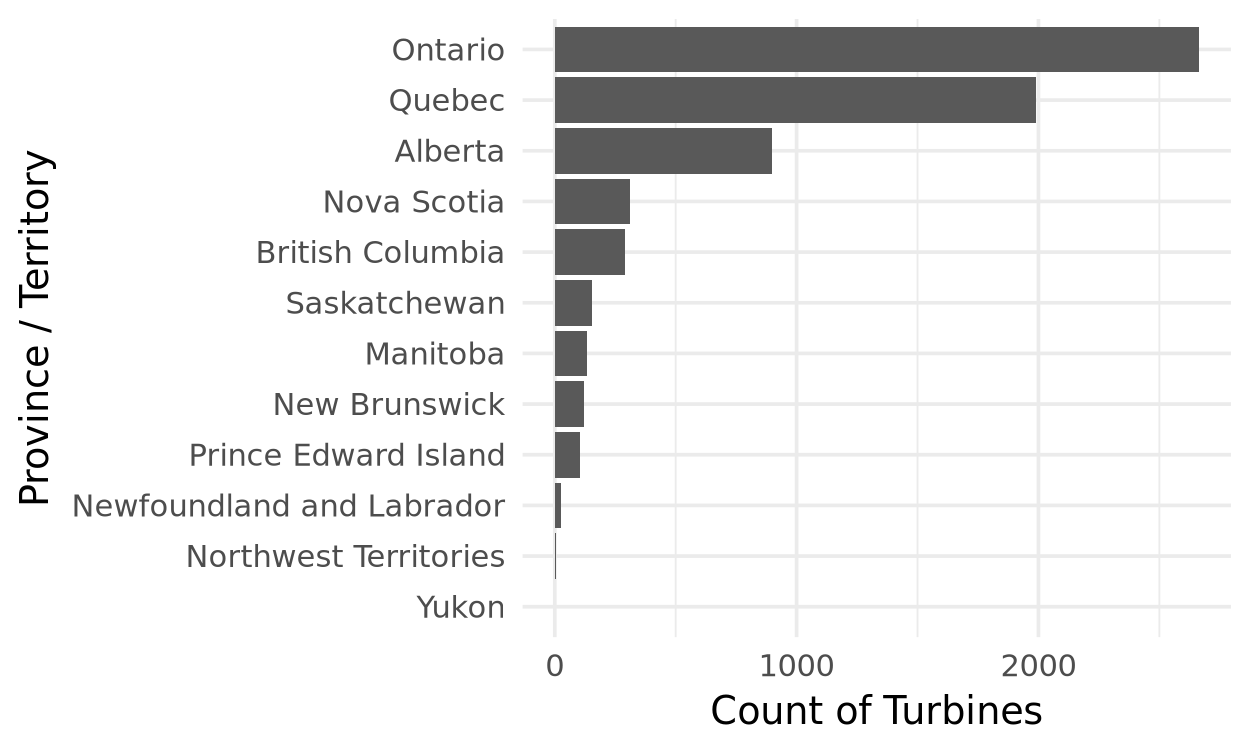

In [2]:
turbines_2 <- turbines |>
    mutate(provterr_sort = province_territory |> fct_infreq() |> fct_rev())

options(repr.plot.width = 5)

ggplot(turbines_2, aes(y = provterr_sort)) + 
    geom_bar() + 
    theme_minimal() + 
    labs(x = "Count of Turbines", y = "Province / Territory")

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

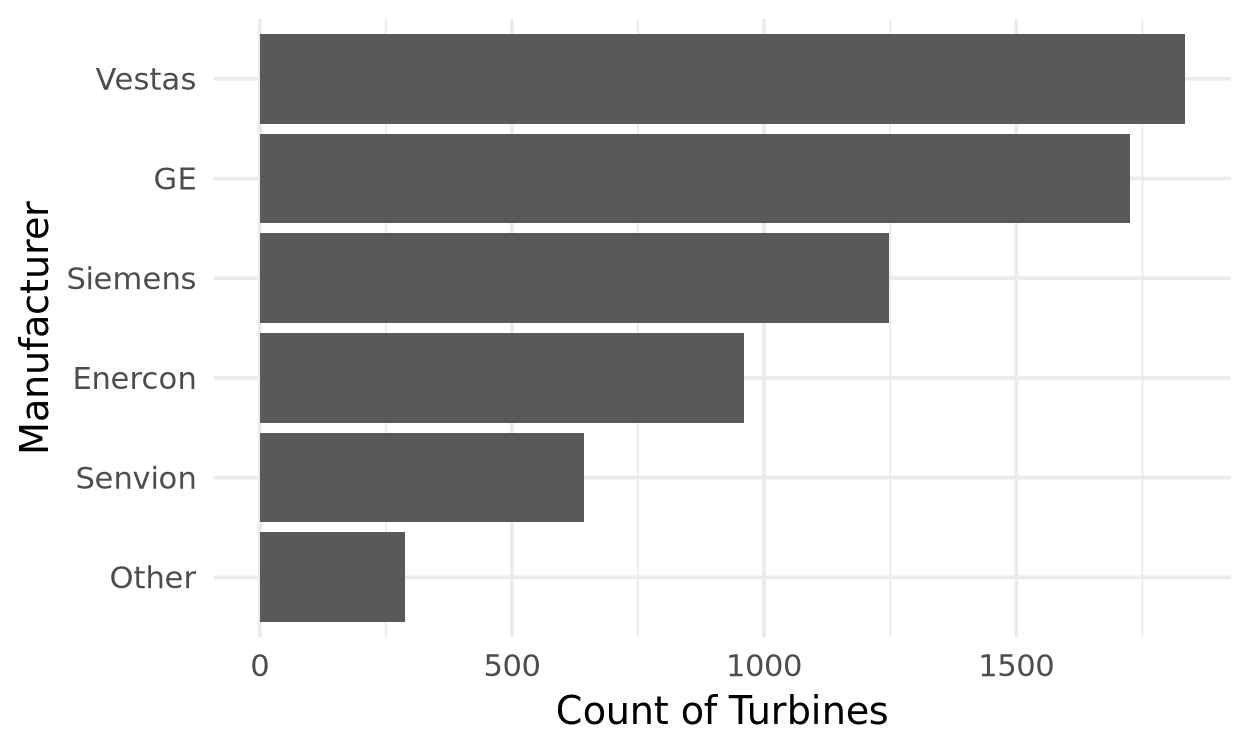

In [3]:
# Using COUNT to get a sense of the manufacturer levels & frequencies, we'll make a decision to group 
# all manufacturers w/ a count < 600 as 'other'. So we need 6 levels
# turbines_2 |> count(manufacturer)

turbines_3 <- turbines_2 |>
    mutate(manfct_sort = manufacturer |> fct_lump(n = 5) |> fct_infreq() |> fct_rev() |> fct_relevel('Other', after = 0))

ggplot(turbines_3, aes(y = manfct_sort)) + 
    geom_bar() + 
    theme_minimal() + 
    labs(x = "Count of Turbines", y = "Manufacturer")

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [4]:
library('mapdata')

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Now we can retrieve the "data" for a map of Canada. Run this code:

In [5]:
canada = map_data('world', region='Canada')  

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

In [6]:
# canada |> glimpse()
# canada |> head(1)

# turbines_3 |> glimpse()
# turbines_3 |> head(1)

# They are not the same, so we'll change the variable names in the canada set
canada_2 <- canada |>
    rename(longitude = long, latitude = lat)

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

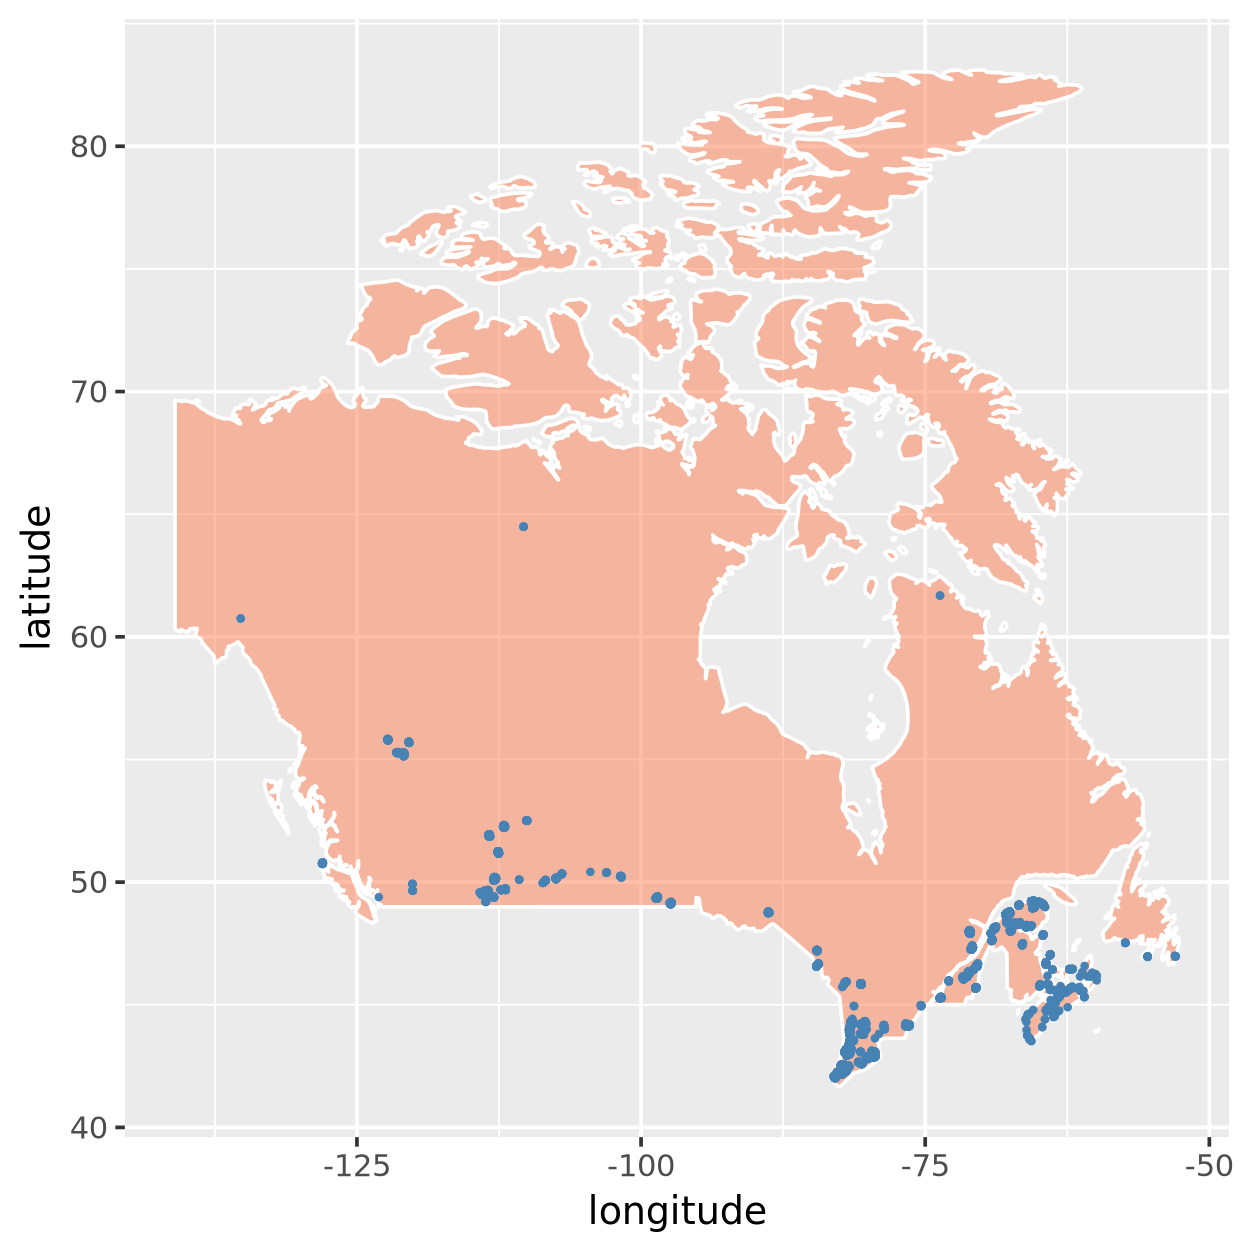

In [7]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data = canada_2) + 
    geom_polygon(aes(x = longitude, y = latitude, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap() + 
    geom_point(data = turbines_3, aes(x = longitude, y = latitude), size = 0.5, color = "steelblue")